In [20]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

import matplotlib.pyplot as plt

## Bootstrapping

Bootstrapping is using empirical data as a prior distribution through resampling. It can often be used to approximate posterior distributions for values that are usually point estimates. We will use linear regression as our problem environment here and randomly sample without replacement. It often doesn't matter whether you resample with or without replacement since in real life, it shouldn't matter if you have seen a particular observation before. Lightning can strike the same place twice.

However, this is a common situation where data scientists cross-validate their models by randomly removing data or training the model on additional data from slightly different contexts. Additionally, data scientists like to use K-fold cross-validation which will randomly split the data into K parts which are each removed and replaced between iterations. This saves some computational power by generating fewer random numbers and it guarantees that every piece of data will be removed the same number of times. Here, however random sampling will work for now.

In [21]:
x1 = np.random.normal(size=1000)
x2 = np.random.normal(size=1000)
x3 = np.random.normal(size=1000)
y = 1*x1 - 3*x2 + 10*x3 + np.random.normal(10,3,size=1000)

In [22]:
y[:5]

array([ 16.01293513,  24.05662069,   2.5969851 ,  20.14990438,
       -16.34550261])

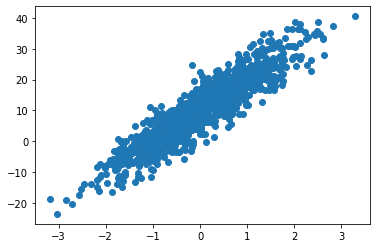

In [23]:
plt.scatter(x3,y)

In [24]:
X = np.vstack([x1, x2, x3]).T

In [25]:
lr = LinearRegression()

In [26]:
lr.fit(X, y)

LinearRegression()

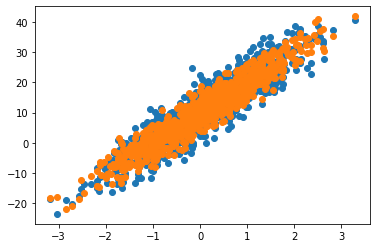

In [27]:
plt.scatter(x3, y)
plt.scatter(x3, lr.predict(X))

In [28]:
lr.coef_

array([ 1.08556208, -2.90533522,  9.82940303])

In [29]:
lr.score(X,y)

0.9247097254480159

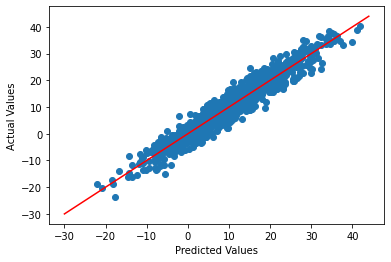

In [30]:
plt.scatter(lr.predict(X), y)
plt.plot(range(-30,45),range(-30,45),c='red')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

Text(0.5, 0, 'Y-value')

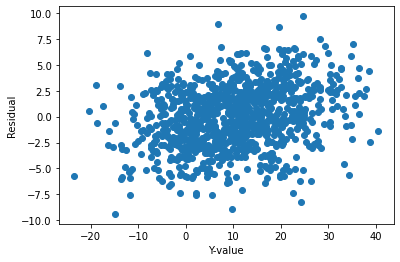

In [31]:
plt.scatter(y, y-lr.predict(X))
plt.ylabel('Residual')
plt.xlabel('Y-value')

In [32]:
ols = sm.OLS(y, np.concatenate([np.ones((1000,1)), X], axis=1))
ols_results = ols.fit()
ols_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     4078.
Date:                Fri, 20 Aug 2021   Prob (F-statistic):               0.00
Time:                        07:44:42   Log-Likelihood:                -2516.0
No. Observations:                1000   AIC:                             5040.
Df Residuals:                     996   BIC:                             5060.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.0091      0.095    105.369      0.000       9.823      10.196
x1             1.0856      0.094     11.597      0.000       0.902       1.269
x2            -2.9053      0.095    -30.672      0.000      -3.091      -2.719
x3             9.8294      0.094    104.297      0.000       9.644      10.014
==============================================================================
Omnibus:                        3.027   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.220   Jarque-Bera (JB):                2.854
Skew:                          -0.078   Prob(JB):                        0.240
Kurtosis:                       2.791   Cond. No.                         1.07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
ols_results.predict()

In [41]:
X = pd.DataFrame(X, columns = ['x1','x2','x3'])
y = pd.DataFrame(y, columns=['y'])

scores = np.zeros(1000, dtype=np.float64)

for i in range(1000):
    train_ind = np.random.choice(range(1000), size=700, replace=False)
    train_x, train_y, test_x, test_y = (X.loc[train_ind, :], y.loc[train_ind], X.drop(train_ind, axis=0), y.drop(train_ind, axis=0))
    
    lr = LinearRegression()
    lr.fit(train_x, train_y)
    scores[i] = lr.score(test_x, test_y)

In [42]:
scores.sort()

In [58]:
# Our confidence interval for the predictive power of our model
scores[24], scores[974]

(0.9095102661045182, 0.9351694740338367)

In [54]:
residuals = np.zeros((0,), dtype=np.float64)

for i in range(30000 // 300):
    train_ind = np.random.choice(range(1000), size=700, replace=False)
    train_x, train_y, test_x, test_y = (X.loc[train_ind, :], y.loc[train_ind], X.drop(train_ind, axis=0), y.drop(train_ind, axis=0))
    
    lr = LinearRegression()
    lr.fit(train_x, train_y)
    residuals = np.hstack([residuals, (test_y - lr.predict(test_x)).to_numpy().reshape(-1)])

In [55]:
residuals[:10]

array([ 2.1994766 , -1.02504137,  3.43691165, -3.89972415,  5.54667127,
        4.71593758, -5.84489038,  1.47932562, -0.60847788,  2.25979392])

In [56]:
residuals.sort()

In [59]:
# Our confidence interval for the average prediction
residuals[30000//40-1], residuals[30000-30000//40]

(-5.913011261646595, 5.74745004028124)

In [61]:
np.median(residuals)

-0.009180703127955603

In [62]:
np.mean(residuals)

-0.057294768977547816